## A quick look at Residential housing in Philadelphia

Data gathered from [opendataphilly](https://www.opendataphilly.org/dataset/opa-property-assessments) using the [Socrata API](https://dev.socrata.com/foundry/data.phila.gov/tqtk-pmbv) to filter dataset.

I would like to use this to help find properties likely to contain lead paint. This will require a number of assumptions

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [162]:
# use pandas to read csv and store as dataframe object 
buildings = pd.read_csv('data/properties.csv', dtype={'census_tract': object} )

In [ ]:
buildings.info()
buildings.head()

The accuracy of the data is important. Knowing exact dates of the buildings construction will be helpful in determining the possibility of lead contamination. An estimated date is still helpful - materials and styles of building have not changed greatly from year to year. We are going to be looking at all buildings built (or estimated to have been built) prior to 1975 (when lead paint was banned). As we can see below, the majority of the buildings in the dataset have had their dates estimated.

In [164]:
estimate_counts = buildings['year_built_estimate'].value_counts()
estimate_counts

Y    438729
N       382
0        12
Name: year_built_estimate, dtype: int64

Using the `value_counts` method counts the number of occurances of a specified value. To find the 10 most commonly occuring street in the data set we can run code below.

In [184]:
street_counts = cframe['street_name'].value_counts()
street_counts[:10]

LOCUST      3081
18TH        2650
06TH        2648
SPRUCE      2597
02ND        2587
WALNUT      2338
16TH        2324
05TH        2308
08TH        2294
CHESTNUT    2292
Name: street_name, dtype: int64

Now to plot this we need to import matplotlib and add juypter magic to allow it to show the plot inline:

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt

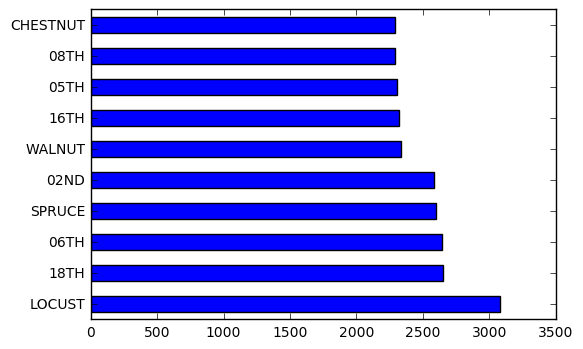

In [195]:
plt.figure()
street_counts[:10].plot(kind='barh', rot=0)

I now want to look at each street and find how many houses are pre 1975 and how many are post 1975. 

# To Do

Currently I am at a bit of a wall here - I have been following [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) and I'm at [Chapter 2](https://nbviewer.jupyter.org/github/pydata/pydata-book/blob/master/ch02.ipynb). I am adapting the bit.ly example and at the point below, the column in the example has object / string dtypes . In my data set the column is a float64 - it contains floats and NaN values (empty fields). [This](http://chris.friedline.net/2015-12-15-rutgers/lessons/python2/03-data-types-and-format.html) had been a helpful reference on datatypes.

What I think I need to do is to **create a subset of the data, only keeping rows that do not contain NaN values, and have the dtype as int64.** With this I would then like to arrange `year_built` into pre and post 1975.

In [ ]:
year_prepost = np.where(buildings['year_built'].str.contains('1975'),
                            'Pre 1975', 'Post 1975')
year_prepost[:10]

# Done!

I was correct in creating a subset of the data called `cframe` it has the `year_built` column but contains the cells that are _not null_

In [168]:
cframe = buildings[buildings.year_built.notnull()]

In [169]:
year_prepost = np.where(cframe['year_built'] < 1978,
                            'Pre 1978', 'Post 1978')
year_prepost[:10]

array(['Pre 1978', 'Pre 1978', 'Pre 1978', 'Pre 1978', 'Pre 1978',
       'Pre 1978', 'Pre 1978', 'Pre 1978', 'Pre 1978', 'Pre 1978'], 
      dtype='<U9')

In [170]:
by_year_street = cframe.groupby(['street_name', year_prepost])

In [171]:
agg_counts = by_year_street.size().unstack().fillna(0)

In [172]:
agg_counts[:10]

,Post 1978,Pre 1978
street_name,,
02ND,700.0,1887.0
03RD,209.0,1743.0
04TH,221.0,1882.0
05TH,152.0,2156.0
06TH,611.0,2037.0
07TH,147.0,2095.0
08TH,109.0,2185.0
09TH,91.0,1787.0
10TH,57.0,1668.0


In [173]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

street_name
02ND     354
03RD     346
04TH    2353
05TH     765
06TH     710
07TH     713
08TH    2485
09TH     211
10TH    1688
11TH    1804
dtype: int64

In [182]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Post 1978,Pre 1978
street_name,,
CHESTNUT,39.0,2253.0
08TH,109.0,2185.0
05TH,152.0,2156.0
16TH,251.0,2073.0
WALNUT,694.0,1644.0
02ND,700.0,1887.0
SPRUCE,56.0,2541.0
06TH,611.0,2037.0
18TH,325.0,2325.0


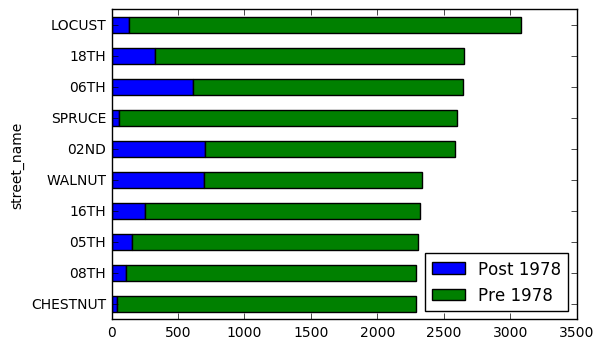

In [196]:
plt.figure()
count_subset.plot(kind='barh', stacked=True)